# Explore here

In [15]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error



url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
data = pd.read_csv(url)

print(data.head())
print(data.info())


                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [15]:
data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


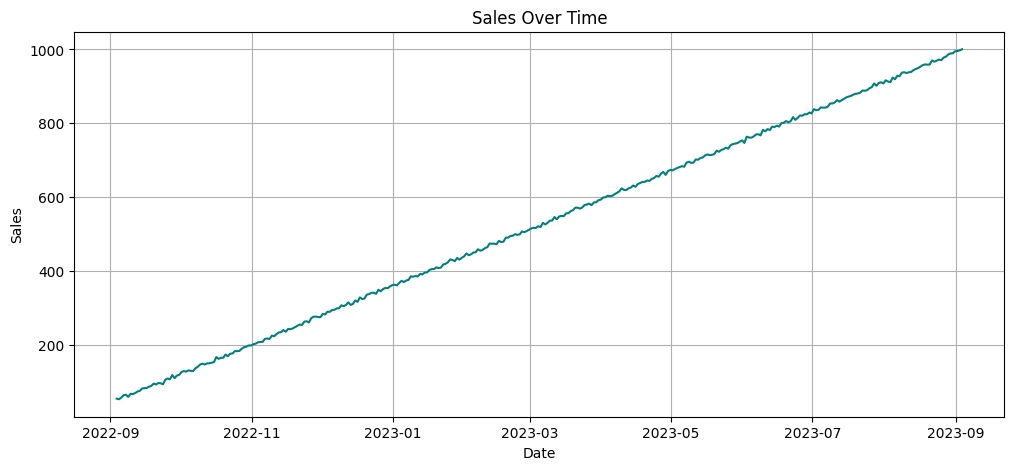

In [10]:
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(data["sales"], color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [4]:
data

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [12]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

In [13]:
model = ARIMA(train["sales"], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Mon, 30 Jun 2025   AIC                           1683.092
Time:                        23:57:11   BIC                           1694.112
Sample:                             0   HQIC                          1687.507
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1070.826      0.000       0.998       1.002
ma.L1         -0.9996      0.749     -1.334      0.182      -2.468       0.469
sigma2        18.3660     13.863      1.325      0.1

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


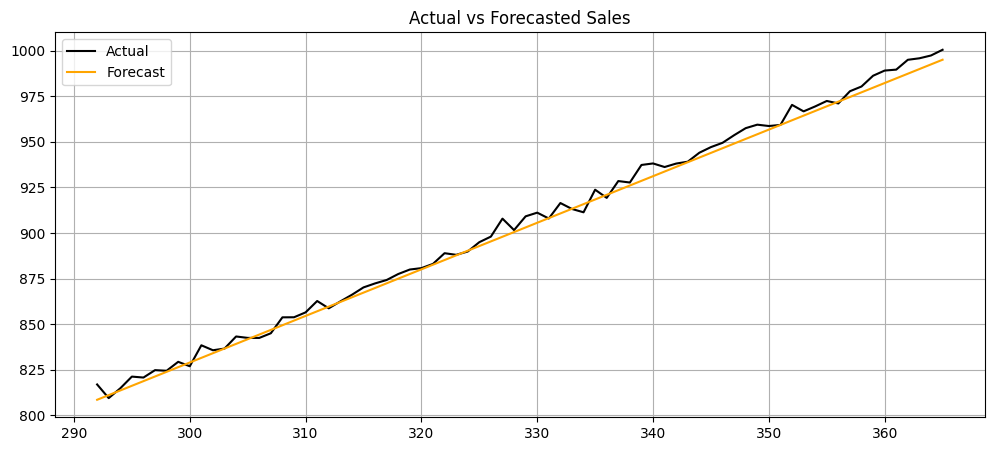

In [14]:
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 5))
plt.plot(test.index, test["sales"], label="Actual", color="black")
plt.plot(test.index, forecast, label="Forecast", color="orange")
plt.title("Actual vs Forecasted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
mse = mean_squared_error(test["sales"], forecast)
mae = mean_absolute_error(test["sales"], forecast)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 16.49
Mean Absolute Error: 3.28


In [ ]:
# There are discrepancies on the packages. It was a mision to get what I needed to run properly.
# I had to uninstall numpy and reinstall them to an older version.
# Same thing with arima

#You guys might want to check on that to prevent future students to have the same issue.
# If it helps, i ran these in the terminal: pip uninstall -y pmdarima
# pip install --quiet --force-reinstall "numpy<1.27"
# pip install --quiet pmdarima==2.0.4